<a href="https://colab.research.google.com/github/Rohit-Prasanna/Sentimental_Analysis_2/blob/main/Sentimental_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'both', 's', 'further', 'ma', 'then', 'at', 'below', 'our', 'his', "didn't", 'don', 'into', 'i', 'over', 'now', 'but', 'are', "shan't", 'd', 'theirs', 'just', 'mustn', 'me', 'if', 're', 'my', 'when', 'o', 'why', 'an', 'should', 'own', 'few', 'in', 'she', 'very', "mightn't", 'a', 'only', 'yourselves', 'had', 'off', 'wasn', 'on', 'ain', 'with', 'mightn', 'and', 'ours', 'you', 'been', 'to', 'not', 't', 'as', 'which', 'shouldn', 'other', 'didn', 'hadn', 'because', 'do', 'being', 'this', 'shan', 'above', 'against', 'couldn', "mustn't", 'him', 'for', 'am', 'between', "haven't", 'weren', 'who', "you'd", 'was', 'yourself', 'yours', "won't", 'down', 'we', 'ourselves', 'doesn', 'be', 've', "that'll", 'himself', 'by', 'such', 'through', 'under', "couldn't", 'have', "isn't", "shouldn't", 'will', "you've", 'them', "hasn't", 'whom', 'won', 'does', 'y', 'is', 'has', 'there', 'where', 'from', "wouldn't", 'can', 'isn', 'once', "doesn't", "you'll", "she's", 'no', 'than', 'after', 'up', 'having', "needn

In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'both', 'eight', 'cry', 'however', 'further', 'sometime', 'at', 'below', 'part', 'anyhow', 'much', 'our', 'top', 'his', 'forty', 'into', 'one', 'over', 'former', 'now', 'but', 'onto', 'among', 'sixty', 'eleven', 'me', 'thick', 'towards', 'throughout', 'thereby', 'when', 'though', 'thru', 'give', 'fill', 'last', 'own', 'few', 'except', 'she', 'mill', 'hereupon', 'might', 'system', 'cannot', 'seem', 'on', 'made', 'alone', 'been', 'not', 'as', 'across', 'everywhere', 'other', 'thin', 'beside', 'meanwhile', 'because', 'do', 'above', 'along', 'nothing', 'serious', 'him', 'couldnt', 'together', 'for', 'others', 'beforehand', 'was', 'get', 'thus', 'yours', 'side', 'otherwise', 'ourselves', 'name', 'therefore', 'somehow', 'third', 'bill', 'such', 'through', 'under', 'amongst', 'have', 'nevertheless', 'whether', 'less', 'could', 'without', 'will', 'somewhere', 'them', 'may', 'whom', 'anyone', 'still', 'every', 'anywhere', 'where', 'anyway', 'there', 'has', 'four', 'from', 'besides', 'none', 'c

In [6]:
combined_stopwords=nltk_stopwords.union(sklearn_stopwords)

In [7]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [8]:

!pip install contractions==0.1.72

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.5 MB/s eta 0:00:00


In [9]:
import contractions
def cleaning(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [12]:
df['clean_text'] = df['review'].apply(cleaning)
# cleaned_tweets = list(df1['text'].apply(cleaning))
# print(cleaned_tweets[:10])

['reviewer', 'mentioned', 'watching', 'episode', 'hooked', 'right', 'exactly', 'happened', 'thing', 'struck', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'called', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face']


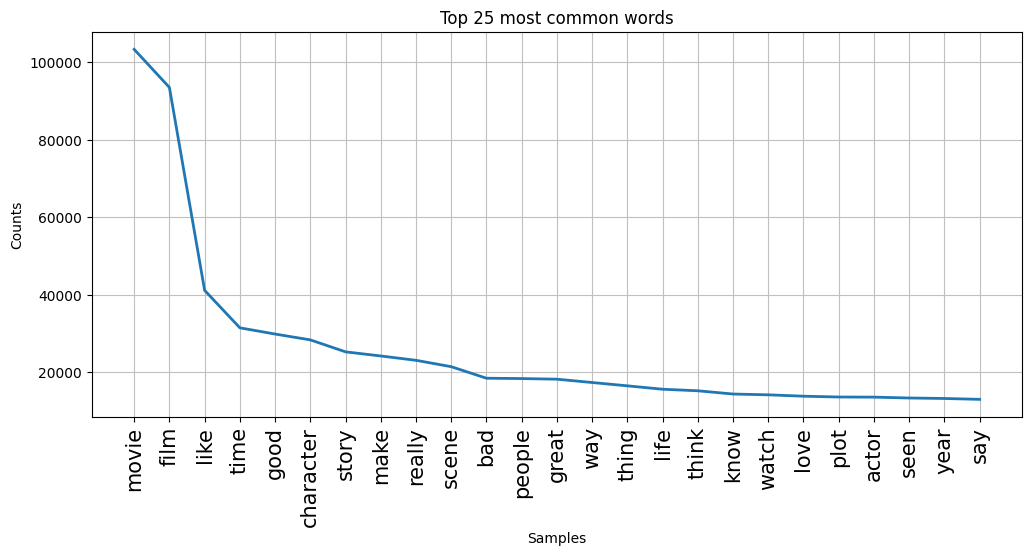

In [15]:
all_words = []
for t in df ['clean_text']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [16]:
domain_stopwords = ['movie', 'film', 'really', 'make', 'time','people','thing','scene']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [17]:
import contractions
def cleaningN(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in final_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [18]:
df['clean_text'] = df['review'].apply(cleaningN)
# cleaned_tweets = list(df1['text'].apply(cleaning))
# print(cleaned_tweets[:10])

In [20]:
x= df['clean_text'].values
y=df['sentiment'].values

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)


In [25]:
import sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [26]:
x_train_pred=model.predict(x_train)
arracy_train=sklearn.metrics.accuracy_score(y_train,x_train_pred)
arracy_train

0.931325

In [27]:
x_test_pred=model.predict(x_test)
arracy_test=sklearn.metrics.accuracy_score(y_test,x_test_pred)
arracy_test

0.8896

In [28]:
import pickle

In [29]:

filename='tfidf_vectorizer.pkl'
pickle.dump(vectorizer,open(filename,'wb'))

In [30]:
filename='senti_finalized_model.sav'
pickle.dump(model,open(filename,'wb'))

In [31]:
load_model=pickle.load(open("/content/senti_finalized_model.sav",'rb'))

In [33]:
def output_lable(n):
    if n == 'negative':
        return "The Text Sentiment is Negative"
    elif n == 'positive':
        return "The Text Sentiment is Positive"
    else:
        return "The Text Sentiment is Neutral"
def wp(text):
    return text.lower()

# Define the manual testing function
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorizer.transform(new_x_test)
    return new_xv_test

# Example usage of manual_testing
text = "I had a fantastic day at the park with my family!"
result = manual_testing(text)
pred_lr = load_model.predict(result)
output_label = output_lable(pred_lr[0])
print(output_label)

The Text Sentiment is Positive
